<a href="https://colab.research.google.com/github/cristinaegus/Pandas_Python_IA/blob/main/Copia_de_Copia_de_Ejercicios_de_Uniones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unión de Tablas de Datos Meteorológicos

Tienes el excel EstaciónMeteo.xlsx con datos horarios de una estación meteorológica que contienen información sobre temperatura, humedad y presión atmosférica. Las tres tablas tienen las mismas columnas, excepto la segunda tabla, que no contiene datos de presión atmosférica. Une las tres tablas verticalmente.

In [ ]:
import pandas as pd

Cargamos los datos del Excel [Documentación Pandas read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [ ]:
import pandas as pd

archivo = "/content/sample_data/EstaciónMeteo.xlsx"
lunes = pd.read_excel(archivo, sheet_name='Lunes')
martes = pd.read_excel(archivo, sheet_name='Martes')
miercoles = pd.read_excel(archivo, sheet_name='Miércoles')

# Combine 'Hora' with a dummy date to create a datetime index for each day
lunes['Fecha y Hora'] = pd.to_datetime('2023-01-01 ' + lunes['Hora'].astype(str))
martes['Fecha y Hora'] = pd.to_datetime('2023-01-02 ' + martes['Hora'].astype(str))
miercoles['Fecha y Hora'] = pd.to_datetime('2023-01-03 ' + miercoles['Hora'].astype(str))

# Set the datetime index
lunes = lunes.set_index('Fecha y Hora')
martes = martes.set_index('Fecha y Hora')
miercoles = miercoles.set_index('Fecha y Hora')

# Drop the original 'Hora' column
lunes = lunes.drop('Hora', axis=1)
martes = martes.drop('Hora', axis=1)
miercoles = miercoles.drop('Hora', axis=1)

In [ ]:
lunes.head()

,Hora,Temperatura (°C),Humedad (%),Presión (hPa)
0,00:00,10.5,65,1013.2
1,01:00,9.8,68,1012.8
2,02:00,9.2,70,1012.5
3,03:00,8.7,72,1012.3
4,04:00,8.3,74,1012.1


<Axes: >

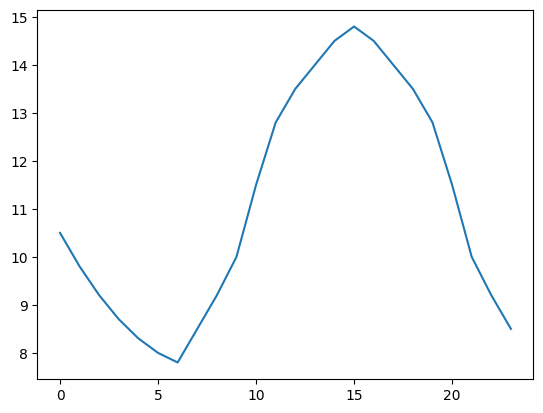

In [ ]:
lunes["Temperatura (°C)"].plot()

Concatenamos las tablas del excel.

In [ ]:
# Concatenate the tables vertically
df = pd.concat([lunes,martes,miercoles])
print (df)

                     Temperatura (°C)  Humedad (%)  Presión (hPa)
Fecha y Hora                                                     
2023-01-01 00:00:00              10.5           65         1013.2
2023-01-01 01:00:00               9.8           68         1012.8
2023-01-01 02:00:00               9.2           70         1012.5
2023-01-01 03:00:00               8.7           72         1012.3
2023-01-01 04:00:00               8.3           74         1012.1
...                               ...          ...            ...
2023-01-03 19:00:00               2.5           93         1010.2
2023-01-03 20:00:00               2.0           95         1010.0
2023-01-03 21:00:00               1.5           97         1009.8
2023-01-03 22:00:00               1.0           99         1009.6
2023-01-03 23:00:00               0.5          100         1009.4

[72 rows x 3 columns]


Posteriormente aparece un csv llamado Vientos.csv de datos de velocidad y dirección del viento pero, en este caso, los datos son cada 15 minutos. Busca una estrategia para unir los datos horizontalmente.

In [ ]:
import pandas as pd

# Primero, cargamos el archivo Vientos.csv
vientos_df = pd.read_csv('/content/sample_data/Vientos.csv', decimal=',')

# Combine 'Día' and 'Hora' to create a datetime index for the wind data
# Assuming the 'Día' column in Vientos.csv corresponds to the same days as the excel data (1 for Lunes, 2 for Martes, 3 for Miércoles)
# We also need to ensure the date format is correct.
# Assuming Day 1 in Vientos.csv is the same date as Lunes (2023-01-01), Day 2 is Martes (2023-01-02), etc.
vientos_df['Fecha y Hora'] = pd.to_datetime('2023-01-' + vientos_df['Día'].astype(str) + ' ' + vientos_df['Hora'].astype(str))

# Set the datetime index
vientos_df = vientos_df.set_index('Fecha y Hora')

# Drop the original 'Día' and 'Hora' columns
vientos_df = vientos_df.drop(['Día', 'Hora'], axis=1)

# Now, remuestreamos los datos de viento a una frecuencia horaria.
# Por ejemplo, tomando el promedio de los valores de viento dentro de cada hora.
# Puedes elegir otra función de agregación (sum(), first(), last(), min(), max())
# según lo que tenga sentido para tus datos y análisis.
vientos_horario = vientos_df.resample('H').mean()

# Ahora que ambos DataFrames tienen la misma frecuencia (horaria) y un índice de tiempo,
# podemos unirlos horizontalmente utilizando el índice.
# Usamos pd.merge con los índices. También podrías usar df.join(vientos_horario).

# Usando merge:
# merge(left, right, left_index=True, right_index=True, how='left')
# We use 'left' to keep all rows from the original dataframe 'df' and add the resampled wind data.
df_unido_horizontalmente = pd.merge(df, vientos_horario, left_index=True, right_index=True, how='left')

# Muestra las primeras filas del DataFrame unido para verificar
print("DataFrame unido horizontalmente (remuestreo de vientos a horario):")
print(df_unido_horizontalmente.head())

DataFrame unido horizontalmente (remuestreo de vientos a horario):
                     Temperatura (°C)  Humedad (%)  Presión (hPa)  \
Fecha y Hora                                                        
2023-01-01 00:00:00              10.5           65         1013.2   
2023-01-01 01:00:00               9.8           68         1012.8   
2023-01-01 02:00:00               9.2           70         1012.5   
2023-01-01 03:00:00               8.7           72         1012.3   
2023-01-01 04:00:00               8.3           74         1012.1   

                     Velocidad del viento  Dirección del viento  
Fecha y Hora                                                     
2023-01-01 00:00:00                 0.000                 234.0  
2023-01-01 01:00:00                 0.000                 234.0  
2023-01-01 02:00:00                 0.000                 234.0  
2023-01-01 03:00:00                 0.125                 244.5  
2023-01-01 04:00:00                 3.000            

/tmp/ipython-input-21-388450157.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vientos_horario = vientos_df.resample('H').mean()


## Análisis de la Relación entre Temperatura y Velocidad del Viento

Vamos a analizar la relación entre la temperatura y la velocidad del viento usando los datos unidos horizontalmente.

In [1]:
# Cargar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos del Excel (ajustando rutas para entorno local)
archivo = "EstaciónMeteo.xlsx"
lunes = pd.read_excel(archivo, sheet_name='Lunes')
martes = pd.read_excel(archivo, sheet_name='Martes')
miercoles = pd.read_excel(archivo, sheet_name='Miércoles')

# Combine 'Hora' with a dummy date to create a datetime index for each day
lunes['Fecha y Hora'] = pd.to_datetime('2023-01-01 ' + lunes['Hora'].astype(str))
martes['Fecha y Hora'] = pd.to_datetime('2023-01-02 ' + martes['Hora'].astype(str))
miercoles['Fecha y Hora'] = pd.to_datetime('2023-01-03 ' + miercoles['Hora'].astype(str))

# Set the datetime index
lunes = lunes.set_index('Fecha y Hora')
martes = martes.set_index('Fecha y Hora')
miercoles = miercoles.set_index('Fecha y Hora')

# Drop the original 'Hora' column
lunes = lunes.drop('Hora', axis=1)
martes = martes.drop('Hora', axis=1)
miercoles = miercoles.drop('Hora', axis=1)

# Concatenate the tables vertically
df = pd.concat([lunes, martes, miercoles])

print("Datos meteorológicos cargados correctamente!")
print(f"Forma del DataFrame: {df.shape}")
print(f"Columnas disponibles: {list(df.columns)}")

Datos meteorológicos cargados correctamente!
Forma del DataFrame: (72, 3)
Columnas disponibles: ['Temperatura (°C)', 'Humedad (%)', 'Presión (hPa)']


In [2]:
# Cargar el archivo Vientos.csv
vientos_df = pd.read_csv('Vientos.csv', decimal=',')

# Combine 'Día' and 'Hora' to create a datetime index for the wind data
vientos_df['Fecha y Hora'] = pd.to_datetime('2023-01-' + vientos_df['Día'].astype(str) + ' ' + vientos_df['Hora'].astype(str))

# Set the datetime index
vientos_df = vientos_df.set_index('Fecha y Hora')

# Drop the original 'Día' and 'Hora' columns
vientos_df = vientos_df.drop(['Día', 'Hora'], axis=1)

# Remuestrear los datos de viento a una frecuencia horaria (promedio)
vientos_horario = vientos_df.resample('H').mean()

# Unir horizontalmente los DataFrames
df_unido_horizontalmente = pd.merge(df, vientos_horario, left_index=True, right_index=True, how='left')

print("Datos de viento cargados y unidos correctamente!")
print(f"Forma del DataFrame unido: {df_unido_horizontalmente.shape}")
print(f"Columnas disponibles: {list(df_unido_horizontalmente.columns)}")
print("\nPrimeras filas del DataFrame unido:")
print(df_unido_horizontalmente.head())

Datos de viento cargados y unidos correctamente!
Forma del DataFrame unido: (72, 5)
Columnas disponibles: ['Temperatura (°C)', 'Humedad (%)', 'Presión (hPa)', 'Velocidad del viento', 'Dirección del viento']

Primeras filas del DataFrame unido:
                     Temperatura (°C)  Humedad (%)  Presión (hPa)  \
Fecha y Hora                                                        
2023-01-01 00:00:00              10.5           65         1013.2   
2023-01-01 01:00:00               9.8           68         1012.8   
2023-01-01 02:00:00               9.2           70         1012.5   
2023-01-01 03:00:00               8.7           72         1012.3   
2023-01-01 04:00:00               8.3           74         1012.1   

                     Velocidad del viento  Dirección del viento  
Fecha y Hora                                                     
2023-01-01 00:00:00                 0.000                 234.0  
2023-01-01 01:00:00                 0.000                 234.0  
2023-01-

C:\Users\Dell\AppData\Local\Temp\ipykernel_13696\2032010008.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vientos_horario = vientos_df.resample('H').mean()


In [4]:
# Explorar las columnas disponibles
print("Columnas en el DataFrame unido:")
print(list(df_unido_horizontalmente.columns))
print("\nPrimeras filas:")
print(df_unido_horizontalmente.head())
print("\nInformación del DataFrame:")
print(df_unido_horizontalmente.info())

Columnas en el DataFrame unido:
['Temperatura (°C)', 'Humedad (%)', 'Presión (hPa)', 'Velocidad del viento', 'Dirección del viento']

Primeras filas:
                     Temperatura (°C)  Humedad (%)  Presión (hPa)  \
Fecha y Hora                                                        
2023-01-01 00:00:00              10.5           65         1013.2   
2023-01-01 01:00:00               9.8           68         1012.8   
2023-01-01 02:00:00               9.2           70         1012.5   
2023-01-01 03:00:00               8.7           72         1012.3   
2023-01-01 04:00:00               8.3           74         1012.1   

                     Velocidad del viento  Dirección del viento  
Fecha y Hora                                                     
2023-01-01 00:00:00                 0.000                 234.0  
2023-01-01 01:00:00                 0.000                 234.0  
2023-01-01 02:00:00                 0.000                 234.0  
2023-01-01 03:00:00                 

In [5]:
# Ver solo las columnas del DataFrame unido
print("Columnas disponibles:")
for i, col in enumerate(df_unido_horizontalmente.columns):
    print(f"{i+1}. {col}")

Columnas disponibles:
1. Temperatura (°C)
2. Humedad (%)
3. Presión (hPa)
4. Velocidad del viento
5. Dirección del viento


Datos disponibles para el análisis: 48 registros


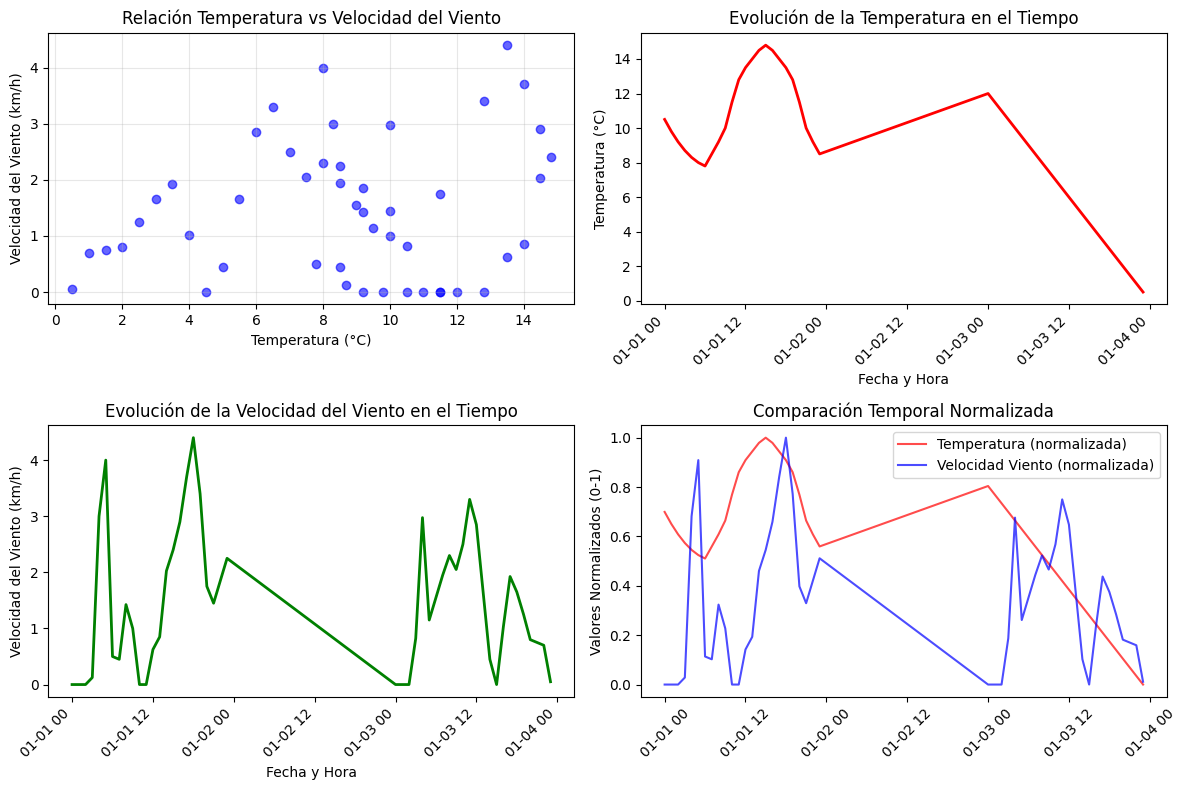


Coeficiente de correlación entre Temperatura y Velocidad del Viento: 0.187
Existe una correlación positiva débil


In [6]:
# Código adaptado para analizar la relación entre temperatura y velocidad del viento
import matplotlib.pyplot as plt

# Preparar los datos para el gráfico
# Eliminar filas con valores NaN para tener datos completos
datos_completos = df_unido_horizontalmente.dropna()

# Extraer las columnas de interés (corrigiendo el nombre de la columna)
temperatura = datos_completos['Temperatura (°C)']
velocidad_viento = datos_completos['Velocidad del viento']

print(f"Datos disponibles para el análisis: {len(datos_completos)} registros")

# 1. Gráfico de dispersión (scatter plot)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(temperatura, velocidad_viento, alpha=0.6, color='blue')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Velocidad del Viento (km/h)')
plt.title('Relación Temperatura vs Velocidad del Viento')
plt.grid(True, alpha=0.3)

# 2. Gráfico de líneas temporal - Temperatura
plt.subplot(2, 2, 2)
datos_completos['Temperatura (°C)'].plot(color='red', linewidth=2)
plt.title('Evolución de la Temperatura en el Tiempo')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)

# 3. Gráfico de líneas temporal - Velocidad del Viento
plt.subplot(2, 2, 3)
datos_completos['Velocidad del viento'].plot(color='green', linewidth=2)
plt.title('Evolución de la Velocidad del Viento en el Tiempo')
plt.ylabel('Velocidad del Viento (km/h)')
plt.xticks(rotation=45)

# 4. Gráfico comparativo de ambas variables normalizadas
plt.subplot(2, 2, 4)
# Normalizar los datos para poder compararlos en la misma escala
temp_norm = (temperatura - temperatura.min()) / (temperatura.max() - temperatura.min())
viento_norm = (velocidad_viento - velocidad_viento.min()) / (velocidad_viento.max() - velocidad_viento.min())

plt.plot(datos_completos.index, temp_norm, label='Temperatura (normalizada)', color='red', alpha=0.7)
plt.plot(datos_completos.index, viento_norm, label='Velocidad Viento (normalizada)', color='blue', alpha=0.7)
plt.title('Comparación Temporal Normalizada')
plt.ylabel('Valores Normalizados (0-1)')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calcular correlación
correlacion = temperatura.corr(velocidad_viento)
print(f"\nCoeficiente de correlación entre Temperatura y Velocidad del Viento: {correlacion:.3f}")

if correlacion > 0.3:
    print("Existe una correlación positiva moderada/fuerte")
elif correlacion > 0.1:
    print("Existe una correlación positiva débil")
elif correlacion < -0.3:
    print("Existe una correlación negativa moderada/fuerte")
elif correlacion < -0.1:
    print("Existe una correlación negativa débil")
else:
    print("No existe correlación significativa entre las variables")

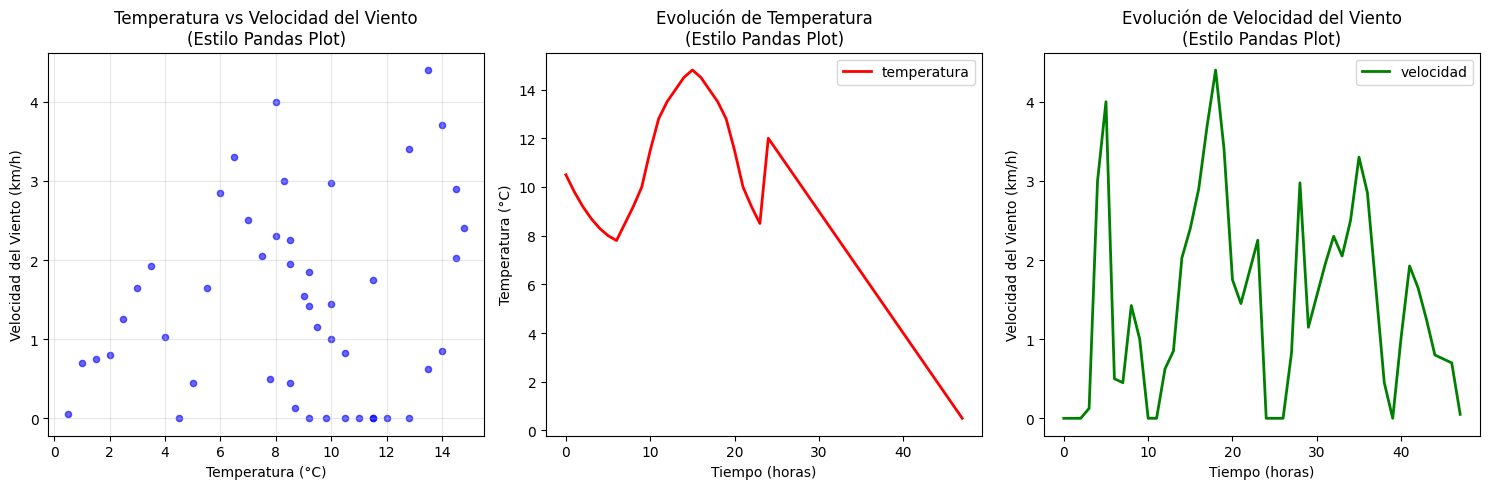

Estadísticas descriptivas:
Temperatura promedio: 8.65°C
Velocidad del viento promedio: 1.45 km/h
Temperatura máxima: 14.80°C
Velocidad del viento máxima: 4.40 km/h


In [7]:
# Gráfico simple estilo pandas (como el ejemplo proporcionado)
# Crear un DataFrame con los datos de temperatura y velocidad del viento

# Preparar datos para el gráfico simple
datos_graficos = pd.DataFrame({
    'temperatura': datos_completos['Temperatura (°C)'],
    'velocidad_viento': datos_completos['Velocidad del viento']
})

# Gráfico 1: Temperatura vs Velocidad del viento (scatter usando pandas)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
datos_graficos.plot('temperatura', 'velocidad_viento', kind='scatter', ax=plt.gca(), alpha=0.6, color='blue')
plt.title('Temperatura vs Velocidad del Viento\n(Estilo Pandas Plot)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Velocidad del Viento (km/h)')
plt.grid(True, alpha=0.3)

# Gráfico 2: Evolución temporal de temperatura (estilo del ejemplo)
plt.subplot(1, 3, 2)
temp_data = pd.DataFrame({
    'hora': range(len(datos_completos)), 
    'temperatura': datos_completos['Temperatura (°C)'].values
})
temp_data.plot('hora', 'temperatura', ax=plt.gca(), color='red', linewidth=2)
plt.title('Evolución de Temperatura\n(Estilo Pandas Plot)')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Temperatura (°C)')

# Gráfico 3: Evolución temporal de velocidad del viento (estilo del ejemplo)
plt.subplot(1, 3, 3)
viento_data = pd.DataFrame({
    'hora': range(len(datos_completos)), 
    'velocidad': datos_completos['Velocidad del viento'].values
})
viento_data.plot('hora', 'velocidad', ax=plt.gca(), color='green', linewidth=2)
plt.title('Evolución de Velocidad del Viento\n(Estilo Pandas Plot)')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Velocidad del Viento (km/h)')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(f"Temperatura promedio: {datos_completos['Temperatura (°C)'].mean():.2f}°C")
print(f"Velocidad del viento promedio: {datos_completos['Velocidad del viento'].mean():.2f} km/h")
print(f"Temperatura máxima: {datos_completos['Temperatura (°C)'].max():.2f}°C")
print(f"Velocidad del viento máxima: {datos_completos['Velocidad del viento'].max():.2f} km/h")